In [1]:
import glob
import os
import pickle
from pathlib import Path

import sys
sys.path.append('../../')

from phys_ml import metrics
from phys_ml.evaluation import vertex as verteval
from phys_ml.load_data.vertex import *
from phys_ml.trainer import TrainerModes
from phys_ml.trainer.vertex import *
from phys_ml.visualization import vertex_visualization as vertvis

In [4]:
info_fn = 'eval_info.pkl'
sample_count = int((2000 * 576 * 3) / (24 * 6))
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': sample_count, 'test_ratio': 0.2, 
                                           'subset': None, 'subset_shuffle': False})

try:
    info = pickle.load(open(info_fn, 'rb'))
except:
    info = []


def train(hidden_dims: list, resume: bool = False, path: str = None):
    if resume:
        if not path:
            path = sorted(trainer.get_full_save_path().glob('*/*'))[-1].as_posix()
        trainer.config.resume = True
        trainer.config.save_path = path
    
    trainer.config.hidden_dims = hidden_dims
    trainer.train(train_mode=TrainerModes.JUPYTERGPU)

    info.append({'hidden_dims': hidden_dims, 'latent_dim': hidden_dims[-1], 
                 'save_path': Path(trainer.config.save_path).as_posix()})
    with open(info_fn, 'wb') as f:
        pickle.dump(info, f)
    print(f">>> dim: {info[-1]['latent_dim']}\n>>> save_path: '{info[-1]['save_path']}'")

In [7]:
###############    TEST RUN    ################

info_fn = 'eval_info.pkl'
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': 2000, 'test_ratio': 0.33, 'epochs': 5,
                                           'subset': 3, 'subset_shuffle': False})


def train(hidden_dims: list, resume: bool = False, path: str = None):
    if resume:
        if not path:
            path = sorted(trainer.get_full_save_path().glob('*/*'))[-1].as_posix()
        trainer.config.resume = True
        trainer.config.save_path = path
    
    trainer.config.hidden_dims = hidden_dims
    trainer.train(train_mode=TrainerModes.JUPYTERGPU)

    try:
        info = pickle.load(open(info_fn, 'rb'))
    except:
        info = []
    info.append({'hidden_dims': hidden_dims, 'latent_dim': hidden_dims[-1], 
                 'save_path': Path(trainer.config.save_path).as_posix()})
    with open(info_fn, 'wb') as f:
        pickle.dump(info, f)
    print(f">>> dim: {info[-1]['latent_dim']}\n>>> save_path: '{info[-1]['save_path']}'")

## train

In [ ]:
# back_up existing info_files
info_name = 'eval_info'
files = sorted(glob.glob(f'{info_name}*.pkl'))
if len(files) > 0:
    last_i = files[-1].split('.')[0][-1] if len(files) > 1 else 0
    new_file = f'{info_name}{last_i + 1}.pkl'
    os.rename(f'{info_name}.pkl', f'{info_name}{last_i + 1}.pkl')

In [5]:
train([128, 64, 32])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 41004: 'val_loss' reached 0.04766 (best 0.04766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=0-step=41004.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 1, global step 82008: 'val_loss' reached

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 123012: 'val_loss' reached 0.01302 (best 0.01302), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=2-step=123012.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 164016: 'val_loss' reached 0.00906 (best 0.00906), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=3-step=164016.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 205020: 'val_loss' reached 0.00633 (best 0.00633), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=4-step=205020.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 246024: 'val_loss' reached 0.00421 (best 0.00421), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=5-step=246024.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 287028: 'val_loss' reached 0.00266 (best 0.00266), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=6-step=287028.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 328032: 'val_loss' reached 0.00163 (best 0.00163), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=7-step=328032.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 369036: 'val_loss' reached 0.00122 (best 0.00122), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=8-step=369036.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 410040: 'val_loss' reached 0.00084 (best 0.00084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=9-step=410040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 10, global step 451044: 'val_loss' reached 0.00119 (best 0.00084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=10-step=451044.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 492048: 'val_loss' reached 0.00029 (best 0.00029), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=11-step=492048.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 533052: 'val_loss' reached 0.00019 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=12-step=533052.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 574056: 'val_loss' reached 0.00020 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=13-step=574056.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 615060: 'val_loss' reached 0.00022 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=14-step=615060.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 15, global step 656064: 'val_loss' reached 0.00010 (best 0.00010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=15-step=656064.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 697068: 'val_loss' reached 0.00012 (best 0.00010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=16-step=697068.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 738072: 'val_loss' reached 0.00009 (best 0.00009), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=17-step=738072.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 779076: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=18-step=779076.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 820080: 'val_loss' reached 0.00011 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=19-step=820080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 861084: 'val_loss' reached 0.00026 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=20-step=861084.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 21, global step 902088: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 943092: 'val_loss' reached 0.00010 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=22-step=943092.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 984096: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=23-step=984096.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1025100: 'val_loss' reached 0.00020 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=24-step=1025100.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1066104: 'val_loss' reached 0.00014 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=25-step=1066104.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1107108: 'val_loss' reached 0.00008 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=26-step=1107108.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 1148112: 'val_loss' reached 0.00013 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=27-step=1148112.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1189116: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=28-step=1189116.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 1230120: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=29-step=1230120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 1271124: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1312128: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1353132: 'val_loss' reached 0.00010 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=32-step=1353132.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1394136: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1435140: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=34-step=1435140.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1476144: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1517148: 'val_loss' reached 0.00009 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=36-step=1517148.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1558152: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1599156: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1640160: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=39-step=1640160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1681164: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1722168: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1763172: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1804176: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 44, global step 1845180: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=44-step=1845180.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1886184: 'val_loss' reached 0.00008 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=45-step=1886184.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1927188: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 47, global step 1968192: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 2009196: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2050200: 'val_loss' reached 0.00006 (best 0.00006), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=49-step=2050200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2091204: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2173212: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=52-step=2173212.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2214216: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2255220: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2296224: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=55-step=2296224.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 56, global step 2337228: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2378232: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2419236: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2501244: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 2542248: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 62, global step 2583252: 'val_loss' was 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 2624256: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 2665260: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=64-step=2665260.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 2706264: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 2747268: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 2788272: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2829276: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=68-step=2829276.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2870280: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=69-step=2870280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2911284: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2952288: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2993292: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3034296: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=73-step=3034296.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3075300: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3116304: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3157308: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3198312: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3239316: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3280320: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3321324: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 3362328: 'val_loss' reached 0.00004 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=81-step=3362328.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 3403332: 'val_loss' reached 0.00005 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=82-step=3403332.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 3444336: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 3485340: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 3526344: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 3567348: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 3649356: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 3690360: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 3731364: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 3813372: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 3854376: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 3895380: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 3936384: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 3977388: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4018392: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4059396: 'val_loss' reached 0.00005 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=98-step=4059396.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4100400: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5'


In [ ]:
train([128, 64, 32, 16])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable params
33.6 K    Total params
0.135     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 41004: 'val_loss' reached 0.14428 (best 0.14428), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=0-step=41004.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 82008: 'val_loss' reached 0.10427 (best 0.10427), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=1-step=82008.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 123012: 'val_loss' reached 0.07889 (best 0.07889), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=2-step=123012.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 164016: 'val_loss' reached 0.06953 (best 0.06953), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=3-step=164016.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 4, global step 205020: 'val_loss' reached 0.05571 (best 0.05571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=4-step=205020.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 246024: 'val_loss' reached 0.04761 (best 0.04761), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=5-step=246024.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 287028: 'val_loss' reached 0.03644 (best 0.03644), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=6-step=287028.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 328032: 'val_loss' reached 0.03270 (best 0.03270), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=7-step=328032.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 369036: 'val_loss' reached 0.02958 (best 0.02958), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=8-step=369036.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 410040: 'val_loss' reached 0.02874 (best 0.02874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=9-step=410040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 451044: 'val_loss' reached 0.02615 (best 0.02615), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=10-step=451044.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 492048: 'val_loss' reached 0.02511 (best 0.02511), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=11-step=492048.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 533052: 'val_loss' reached 0.02342 (best 0.02342), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=12-step=533052.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 574056: 'val_loss' reached 0.02461 (best 0.02342), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=13-step=574056.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 615060: 'val_loss' reached 0.02132 (best 0.02132), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=14-step=615060.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 656064: 'val_loss' reached 0.01967 (best 0.01967), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=15-step=656064.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 697068: 'val_loss' reached 0.01937 (best 0.01937), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=16-step=697068.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 738072: 'val_loss' reached 0.01787 (best 0.01787), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=17-step=738072.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 779076: 'val_loss' reached 0.01765 (best 0.01765), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=18-step=779076.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 820080: 'val_loss' reached 0.01640 (best 0.01640), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=19-step=820080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 861084: 'val_loss' reached 0.01527 (best 0.01527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=20-step=861084.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 902088: 'val_loss' reached 0.01557 (best 0.01527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=21-step=902088.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 943092: 'val_loss' reached 0.01520 (best 0.01520), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=22-step=943092.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 984096: 'val_loss' reached 0.01380 (best 0.01380), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=23-step=984096.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1025100: 'val_loss' reached 0.01326 (best 0.01326), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=24-step=1025100.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1066104: 'val_loss' reached 0.01401 (best 0.01326), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=25-step=1066104.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1107108: 'val_loss' reached 0.01227 (best 0.01227), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=26-step=1107108.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 27, global step 1148112: 'val_loss' reached 0.01151 (best 0.01151), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=27-step=1148112.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1189116: 'val_loss' reached 0.01146 (best 0.01146), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=28-step=1189116.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 30, global step 1271124: 'val_loss' reached 0.01084 (best 0.01084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=30-step=1271124.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1312128: 'val_loss' reached 0.01089 (best 0.01084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=31-step=1312128.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1353132: 'val_loss' reached 0.01010 (best 0.01010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=32-step=1353132.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1394136: 'val_loss' reached 0.01042 (best 0.01010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=33-step=1394136.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1435140: 'val_loss' reached 0.01025 (best 0.01010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=34-step=1435140.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1476144: 'val_loss' reached 0.00953 (best 0.00953), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=35-step=1476144.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1517148: 'val_loss' reached 0.00939 (best 0.00939), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=36-step=1517148.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1558152: 'val_loss' reached 0.00889 (best 0.00889), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=37-step=1558152.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1599156: 'val_loss' reached 0.00888 (best 0.00888), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=38-step=1599156.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1640160: 'val_loss' reached 0.00888 (best 0.00888), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=39-step=1640160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1681164: 'val_loss' reached 0.00899 (best 0.00888), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=40-step=1681164.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1722168: 'val_loss' reached 0.00831 (best 0.00831), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=41-step=1722168.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1763172: 'val_loss' reached 0.00803 (best 0.00803), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=42-step=1763172.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1804176: 'val_loss' reached 0.00859 (best 0.00803), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=43-step=1804176.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1845180: 'val_loss' reached 0.00802 (best 0.00802), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=44-step=1845180.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1886184: 'val_loss' reached 0.00792 (best 0.00792), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=45-step=1886184.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1927188: 'val_loss' reached 0.00766 (best 0.00766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=46-step=1927188.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1968192: 'val_loss' reached 0.00802 (best 0.00766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=47-step=1968192.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 2009196: 'val_loss' reached 0.00757 (best 0.00757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=48-step=2009196.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2050200: 'val_loss' reached 0.00779 (best 0.00757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=49-step=2050200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2091204: 'val_loss' reached 0.00757 (best 0.00757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=50-step=2091204.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 2132208: 'val_loss' reached 0.00749 (best 0.00749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=51-step=2132208.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2173212: 'val_loss' reached 0.00716 (best 0.00716), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=52-step=2173212.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2214216: 'val_loss' reached 0.00736 (best 0.00716), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=53-step=2214216.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2255220: 'val_loss' reached 0.00700 (best 0.00700), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=54-step=2255220.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2296224: 'val_loss' reached 0.00752 (best 0.00700), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=55-step=2296224.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 2337228: 'val_loss' reached 0.00750 (best 0.00700), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=56-step=2337228.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2378232: 'val_loss' reached 0.00670 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=57-step=2378232.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2419236: 'val_loss' reached 0.00690 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=58-step=2419236.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 2460240: 'val_loss' reached 0.00713 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=59-step=2460240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2501244: 'val_loss' reached 0.00685 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=60-step=2501244.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 2542248: 'val_loss' reached 0.00707 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=61-step=2542248.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 2583252: 'val_loss' reached 0.00681 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=62-step=2583252.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 2624256: 'val_loss' reached 0.00707 (best 0.00670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=63-step=2624256.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 2665260: 'val_loss' reached 0.00668 (best 0.00668), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=64-step=2665260.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 2706264: 'val_loss' reached 0.00673 (best 0.00668), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=65-step=2706264.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 2747268: 'val_loss' reached 0.00670 (best 0.00668), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=66-step=2747268.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 2788272: 'val_loss' reached 0.00656 (best 0.00656), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=67-step=2788272.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2829276: 'val_loss' reached 0.00628 (best 0.00628), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=68-step=2829276.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2870280: 'val_loss' reached 0.00637 (best 0.00628), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=69-step=2870280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2911284: 'val_loss' reached 0.00663 (best 0.00628), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=70-step=2911284.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2952288: 'val_loss' reached 0.00634 (best 0.00628), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=71-step=2952288.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2993292: 'val_loss' reached 0.00624 (best 0.00624), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=72-step=2993292.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3034296: 'val_loss' reached 0.00657 (best 0.00624), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=73-step=3034296.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3075300: 'val_loss' reached 0.00619 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=74-step=3075300.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3116304: 'val_loss' reached 0.00639 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=75-step=3116304.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3157308: 'val_loss' reached 0.00619 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=76-step=3157308.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3198312: 'val_loss' reached 0.00630 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=77-step=3198312.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3239316: 'val_loss' reached 0.00633 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=78-step=3239316.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3280320: 'val_loss' reached 0.00621 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=79-step=3280320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3321324: 'val_loss' reached 0.00628 (best 0.00619), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=80-step=3321324.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 81, global step 3362328: 'val_loss' reached 0.00607 (best 0.00607), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=81-step=3362328.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 3403332: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 3444336: 'val_loss' reached 0.00628 (best 0.00607), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=83-step=3444336.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 3485340: 'val_loss' reached 0.00591 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=84-step=3485340.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 3526344: 'val_loss' reached 0.00612 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=85-step=3526344.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 3567348: 'val_loss' reached 0.00602 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=86-step=3567348.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 87, global step 3608352: 'val_loss' reached 0.00595 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 3649356: 'val_loss' reached 0.00614 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=88-step=3649356.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 3690360: 'val_loss' reached 0.00602 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=89-step=3690360.ckpt' as top 10


In [ ]:
train([128, 64, 32, 8])

In [ ]:
train([128, 32, 16, 4])

## evaluate prediction

In [12]:
i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = pickle.load(open(info_fn, 'rb'))

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_0/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 714.79it/s]


 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_1/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 5062.78it/s]


 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_2/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 5063.80it/s]


 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_3/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 5082.46it/s]


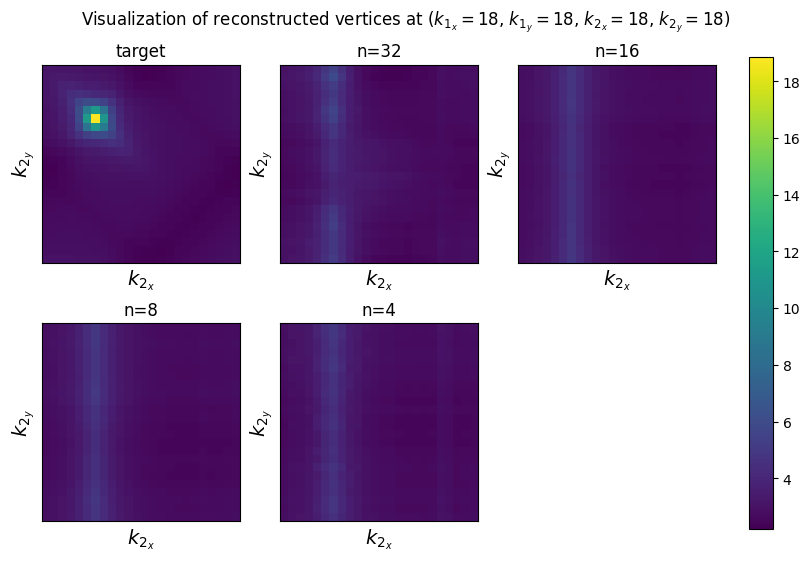

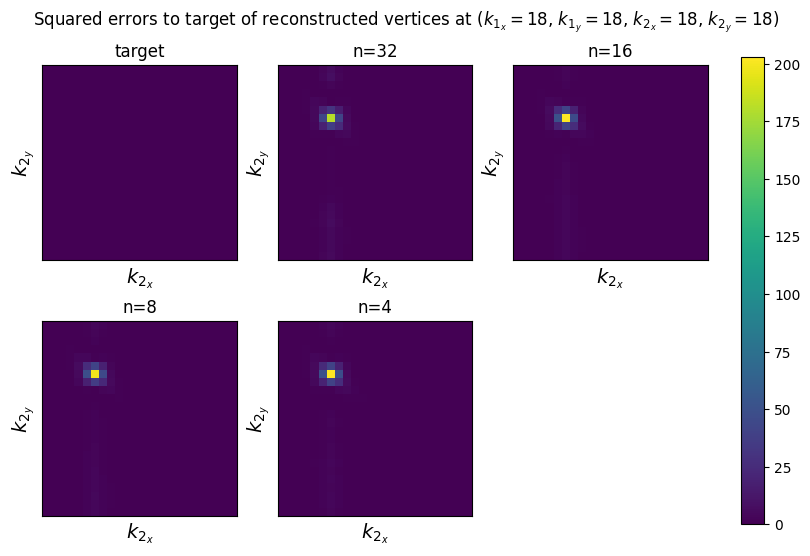

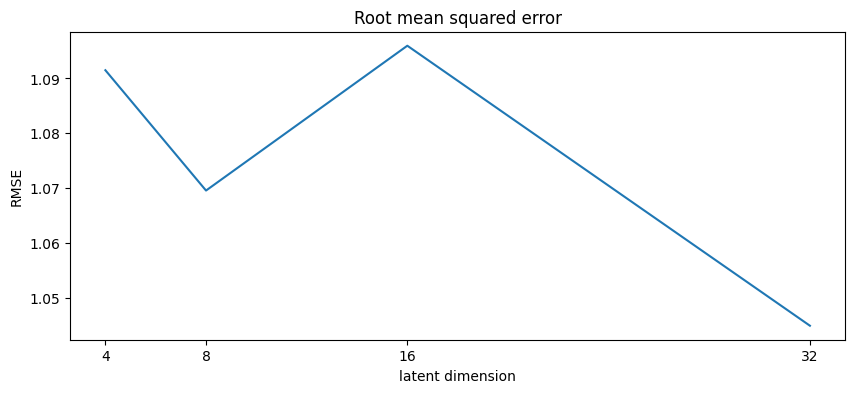

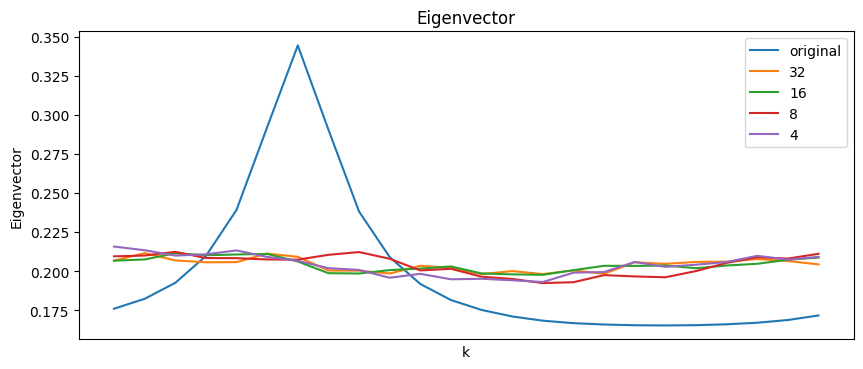

In [18]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, vertex6, (i, i, i, i), axis, nrows, ncols, 
                             trainer.predict_slice2d, kix=i, kiy=i, kjx=i, kjy=i)

 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_0/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:02<00:00, 6777.27it/s]


 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_1/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:02<00:00, 5295.51it/s]


 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_2/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:02<00:00, 5347.69it/s]


 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_3/checkpoints/epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:02<00:00, 5387.13it/s]


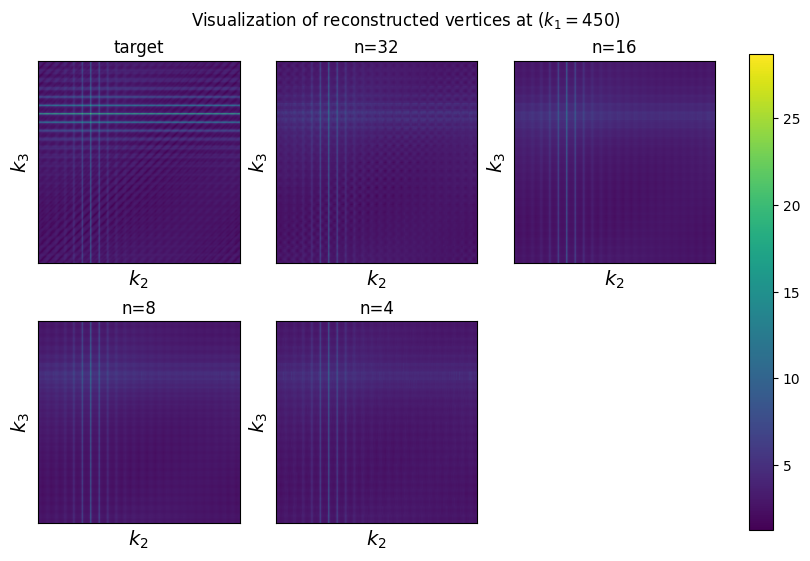

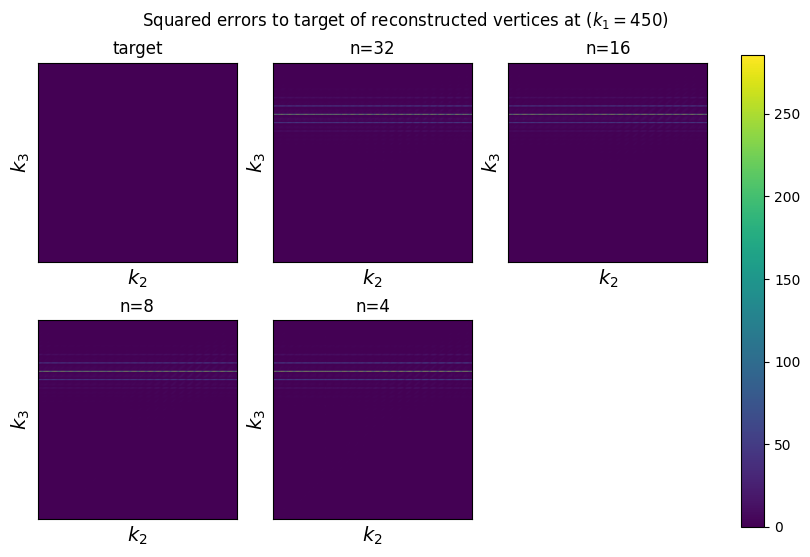

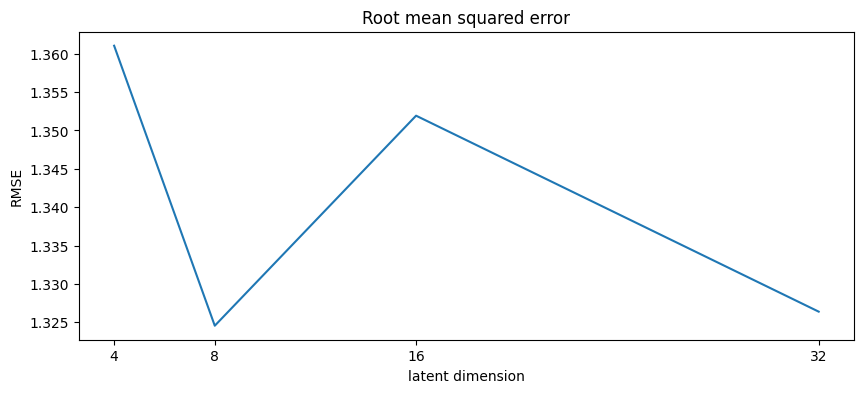

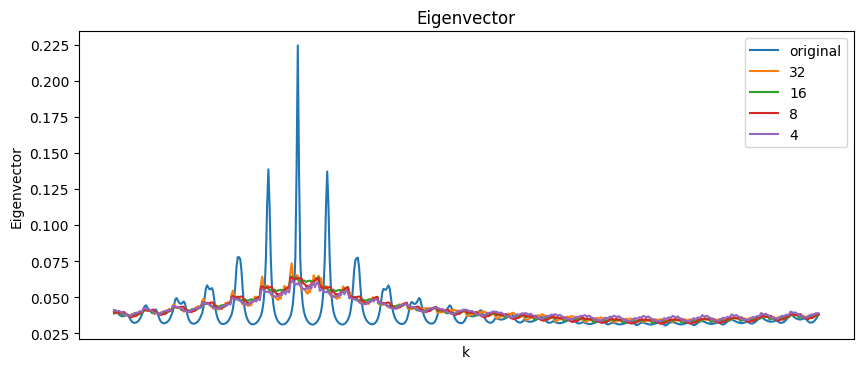

In [19]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, vertex6, (i, i), (k, other_k), nrows, ncols, 
                             trainer.predict_slice4d, kix=i, kiy=i, other_k=other_k)

In [ ]:
# RESULTS FOR 3-DIMENSIONAL PREDICTION
results6, target_slice6 = verteval.evaluate_all_models(info, test_file6d, vertex6, slice_at, axis, 
                                                       predict_func=trainer.predict)

# results for 6d-data
verteval.report_results(results6, target_slice6, slice_at, axis, nrows, ncols)

# results for 3d-data
target_slice3 = 
results3 = {}
verteval.report_results(results3, target_slice3, slice_at, axis, nrows, ncols)

## correlation analysis